# EDA for the auto dataset

In [1]:
# Load the libraries we'll use
######################################

# Basic numerics
import numpy as np
import scipy.stats as st

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

Before doing anything else, we make sure there's a directory to receive the figures we'll plot.

In [2]:
# https://www.tutorialspoint.com/How-can-I-create-a-directory-if-it-does-not-exist-using-Python
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

Also, get the Seaborn version string: we'll need it so as to use the right versions of various plotting commands.

In [3]:
seabornVersionStr = sns.__version__ # e.g. 0.11.0
versionStrParts = seabornVersionStr.split('.')  # yields a list of substrings, e.g. ["0", "11", "0"]

## Reading the data

To showcase tools other than `pandas`, here we read the data using tools from `numpy` alone.

In [4]:
# Open a file for reading
f = open('./auto.txt', 'r')

# Read the data, packing it into named columns
mpg, cyl, dis, hp, wgt, acc, yr, org = np.loadtxt(f, unpack=True, usecols = (0,1,2,3,4,5,6,7))

# Close the file, now that we're finihed with it
f.close() 

#### Restrict attention to a four-variable subset

There's no deep, data-analytic reason for this: the goal is to generate output that will fit onto lecture slides.

In [17]:
X = [mpg, dis, wgt, acc]

#### Summary stats 

In [18]:
xbar = np.mean(X, axis=1) # axis=1 means "Take means down columns"
print(xbar)

[  23.51457286  193.4258794  2970.42462312   15.56809045]


In [19]:
S = np.cov(X)
print(S)

[[ 6.10896108e+01 -6.55402318e+02 -5.50521175e+03  9.05892966e+00]
 [-6.55402318e+02  1.08721992e+04  8.23684232e+04 -1.56332976e+02]
 [-5.50521175e+03  8.23684232e+04  7.17140991e+05 -9.74899011e+02]
 [ 9.05892966e+00 -1.56332976e+02 -9.74899011e+02  7.60484823e+00]]


In [20]:
R = np.corrcoef(X)
print(R)

[[ 1.         -0.80420282 -0.83174093  0.42028891]
 [-0.80420282  1.          0.93282415 -0.54368408]
 [-0.83174093  0.93282415  1.         -0.41745732]
 [ 0.42028891 -0.54368408 -0.41745732  1.        ]]


#### Summary stats with `pandas` 

In [21]:
import pandas as pd

colNames = [
    "MPG", "Cylinders", "Displacement", "Horsepower", 
    "Weight", "Acceleration", "ModelYear", "Origin", "CarName"
]
auto_df = pd.read_csv('./auto.txt', sep='\t', names=colNames )
auto_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Visualisations

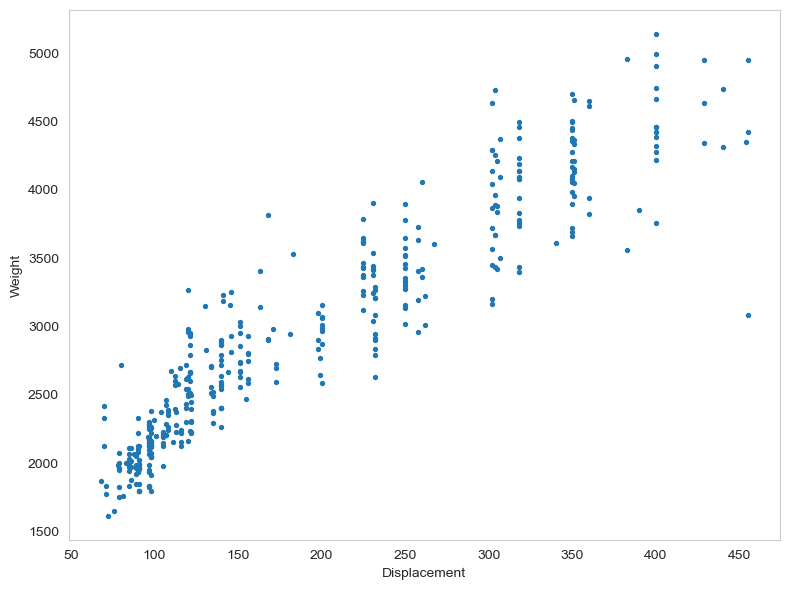

In [27]:
# Scatterplot
plt.figure(figsize=(8,6))
plt.scatter(dis, wgt, s=8) # s=4 sets the size of the points
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.tight_layout()
plt.savefig('Figures/auto1.pdf',format='pdf')

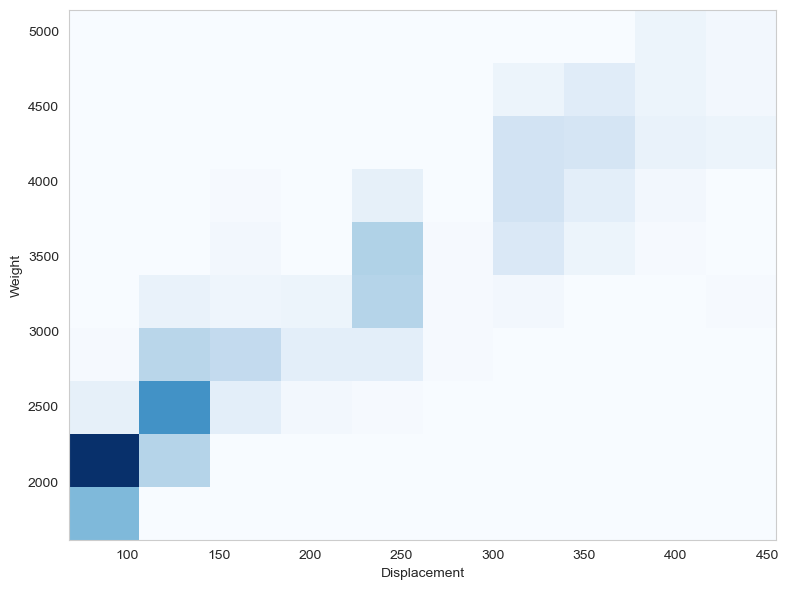

In [11]:
# Two-dimesnional histogram
plt.figure(figsize=(8,6))
plt.hist2d(dis,wgt,cmap='Blues')
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.tight_layout()
plt.savefig('Figures/auto2.pdf',format='pdf')

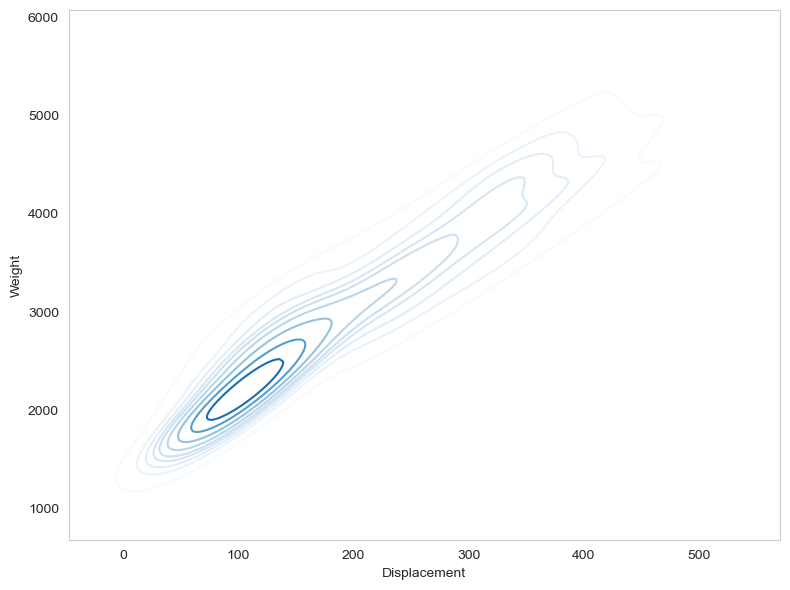

In [12]:
# Two-dimensional kernel density estimate
plt.figure(figsize=(8,6))

# Use whichever version of Seaborn's graphing commands
# are best suited to the installed version
if( int(versionStrParts[1]) < 11 ):
    # Use the older form
    sns.kdeplot( data=dis, data2=wgt, cmap="Blues")
else:
    # Use the more recent form
    sns.kdeplot(x=dis, y=wgt, cmap="Blues")

plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.tight_layout()
plt.savefig('Figures/auto3.pdf',format='pdf')

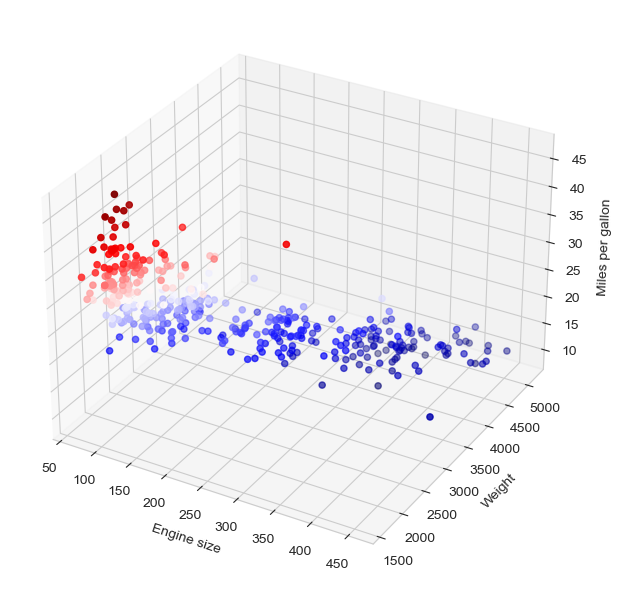

In [13]:
# Three-dimensional scatterplot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(dis,wgt,mpg, marker='o', c=mpg, cmap='seismic')
ax.set_xlabel('Engine size')
ax.set_ylabel('Weight')
ax.set_zlabel('Miles per gallon')
plt.tight_layout()
plt.savefig('Figures/auto4.pdf',format='pdf')

## Pair-plots

These beautiful tables of plots offer some intuition about how pairs of variables vary together.

In [14]:
names = ['Engine size','Weight','Miles per gallon','Acceleration']

In [15]:
X = np.array(X)
X = X.T

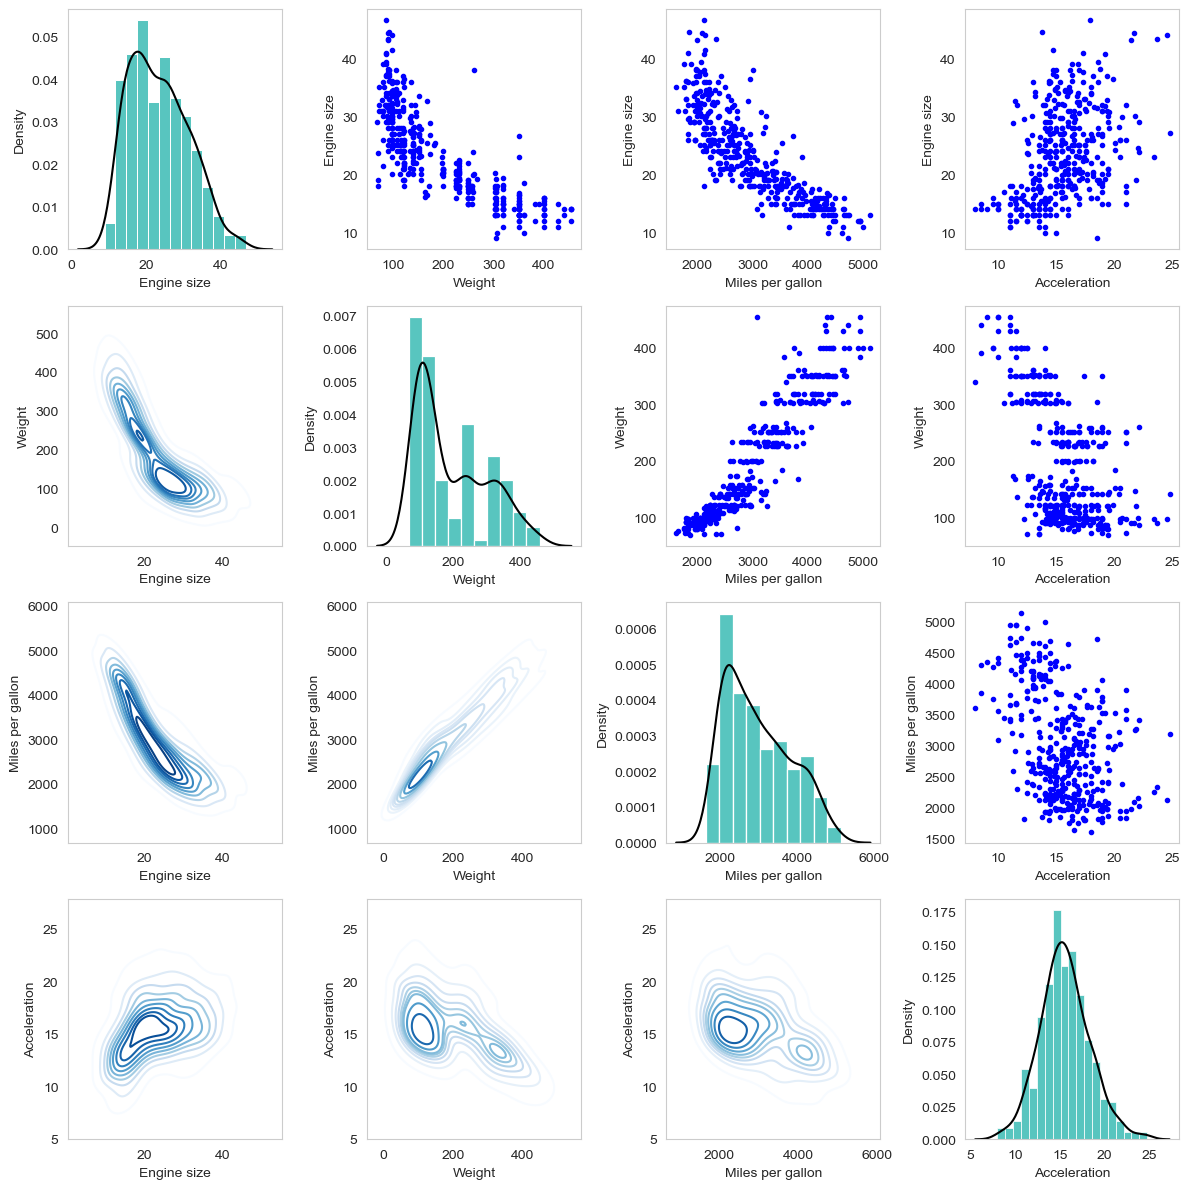

In [16]:
nDataSets = 4
plt.figure(figsize=(12,12))
for i in range(0,nDataSets):
    for j in range(0,nDataSets):
        plt.subplot(nDataSets, nDataSets,1+i+(nDataSets*j))
        if i==j:
            # Draw histograms and KDEs on the diagonal using
            # whichever version of Seaborn command is appropriate
            seabornVersionStr = sns.__version__
            versionStrParts = seabornVersionStr.split('.')
            if( int(versionStrParts[1]) < 11 ):
                # Use the older, now-deprectaed form
                sns.distplot(X[:,i],color="b")
            else:
                # Use the more recet form
                sns.kdeplot( X[:,i], color="black", label="Kernel Density")
                sns.histplot( X[:,i], stat="density", color = "lightseagreen" )
                
            # Add labels
            plt.xlabel(names[i])
            plt.ylabel('Density')
        else:
            if i<j:
                # Plot two-dimensional KDEs below the diagonal, again
                # taking care to work with older versions of Seaborn
                if( int(versionStrParts[1]) < 11 ):
                    # Use the older form
                    sns.kdeplot(data=np.ravel(X[:,i]), data2=np.ravel(X[:,j]),cmap="Blues") 
                else:
                    # Use the more recent form
                    sns.kdeplot(x=np.ravel(X[:,i]),y=np.ravel(X[:,j]),cmap="Blues")  
                  
            else:
                # Put scatterplots above the diagonal
                plt.scatter(X[:,i],X[:,j],c="b",marker=".") 
            
            # Add labels
            plt.ylabel(names[j])
            plt.xlabel(names[i])
            
plt.tight_layout()
plt.savefig('Figures/auto5.pdf',format='pdf')